# Content

In this notebook we test the ability of our distance to distinguish different temporal shufflings. To speed up the simulation, the embeddings are computed separately and loaded from the folder `Data/Embeddings/Shuffling` and then we run tests on both the global and local distances. The notebook to produce the embedding is contained in the `Data` folder and is called `Get embeddings`

In [1]:
import matplotlib.pyplot as plt
from os import listdir
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
# import pandas as pd

import sys
sys.path += ['/home/lorenzo/Scrivania/My_projects/Embeddings/02_GraphD/Dynamic_distance/Codes/Package']

from MatrixDistance import *
from Utilities import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
def f(x):
    '''Convenient function to load data'''
    if len(x) > 1:
        y = x[0]
        for i in range(1, len(x)):
            y = y + '_' + x[i]
            
    else:
        y = x[0]

    return y

In [ ]:
n_graphs = 250

# ground truth assignment 
n = 2*n_graphs
ℓ = np.ones(n)
ℓ[:int(n/2)] = 0

all_gtypes = listdir('Data/Embeddings/Shuffling')

# graphs names
all_gnames = np.unique([x.split('-')[0] for x in all_gtypes])

# shuffling types
all_gtypes = np.unique([f(x.split('-')[1:]) for x in all_gtypes])


for gname in all_gnames:
    print(gname)

    Xlist = [[] for i in all_gtypes]
    
    for j, gtype in enumerate(all_gtypes):
        for i in range(n_graphs):
            x = np.loadtxt('Data/Embeddings/Shuffling/' + gname + '-' + gtype + '/EL' + str(i+1) + '.dat')
            Xlist[j].append(x)

    NMI_matrix = np.zeros((len(Xlist), len(Xlist)))
    NMI_matrix_glob = np.zeros((len(Xlist), len(Xlist)))
    
    for i in range(len(Xlist)):
        for j in range(i+1, len(Xlist)):

            M = np.zeros((2*n_graphs, 2*n_graphs))
            M_glob = np.zeros((2*n_graphs, 2*n_graphs))
            allX = np.concatenate([Xlist[i], Xlist[j]])

            for x, X in enumerate(allX):
                for y, Y in enumerate(allX):
                    if y > x:
                        M[x,y] = EmbDistance(X, Y,  distance_type = 'local')
                        M_glob[x,y] = EmbDistance(X, Y,  distance_type = 'global')

            M = M + M.T
            M_glob = M_glob + M_glob.T

            est_ℓ = ClusterHierarchical(M,2)-1
            est_ℓ_glob = ClusterHierarchical(M_glob,2)-1

            # compute the NMI
            NMI_matrix[i,j] = NMI(ℓ, est_ℓ)
            NMI_matrix_glob[i,j] = NMI(ℓ, est_ℓ_glob)

    # save
    df = pd.DataFrame(NMI_matrix, columns = all_gtypes)
    df.rename(index = dict(zip(np.arange(len(all_gtypes)), all_gtypes)), inplace = True)
    df.to_csv('Data/Results/' + gname + 'NMI_local.csv' )

    df = pd.DataFrame(NMI_matrix_glob, columns = all_gtypes)
    df.rename(index = dict(zip(np.arange(len(all_gtypes)), all_gtypes)), inplace = True)
    df.to_csv('Data/Results/' + gname + 'NMI_global.csv' )

InVS
SFHH
baboons
highschool_2011
highschool_2012
highschool_2013
hospital


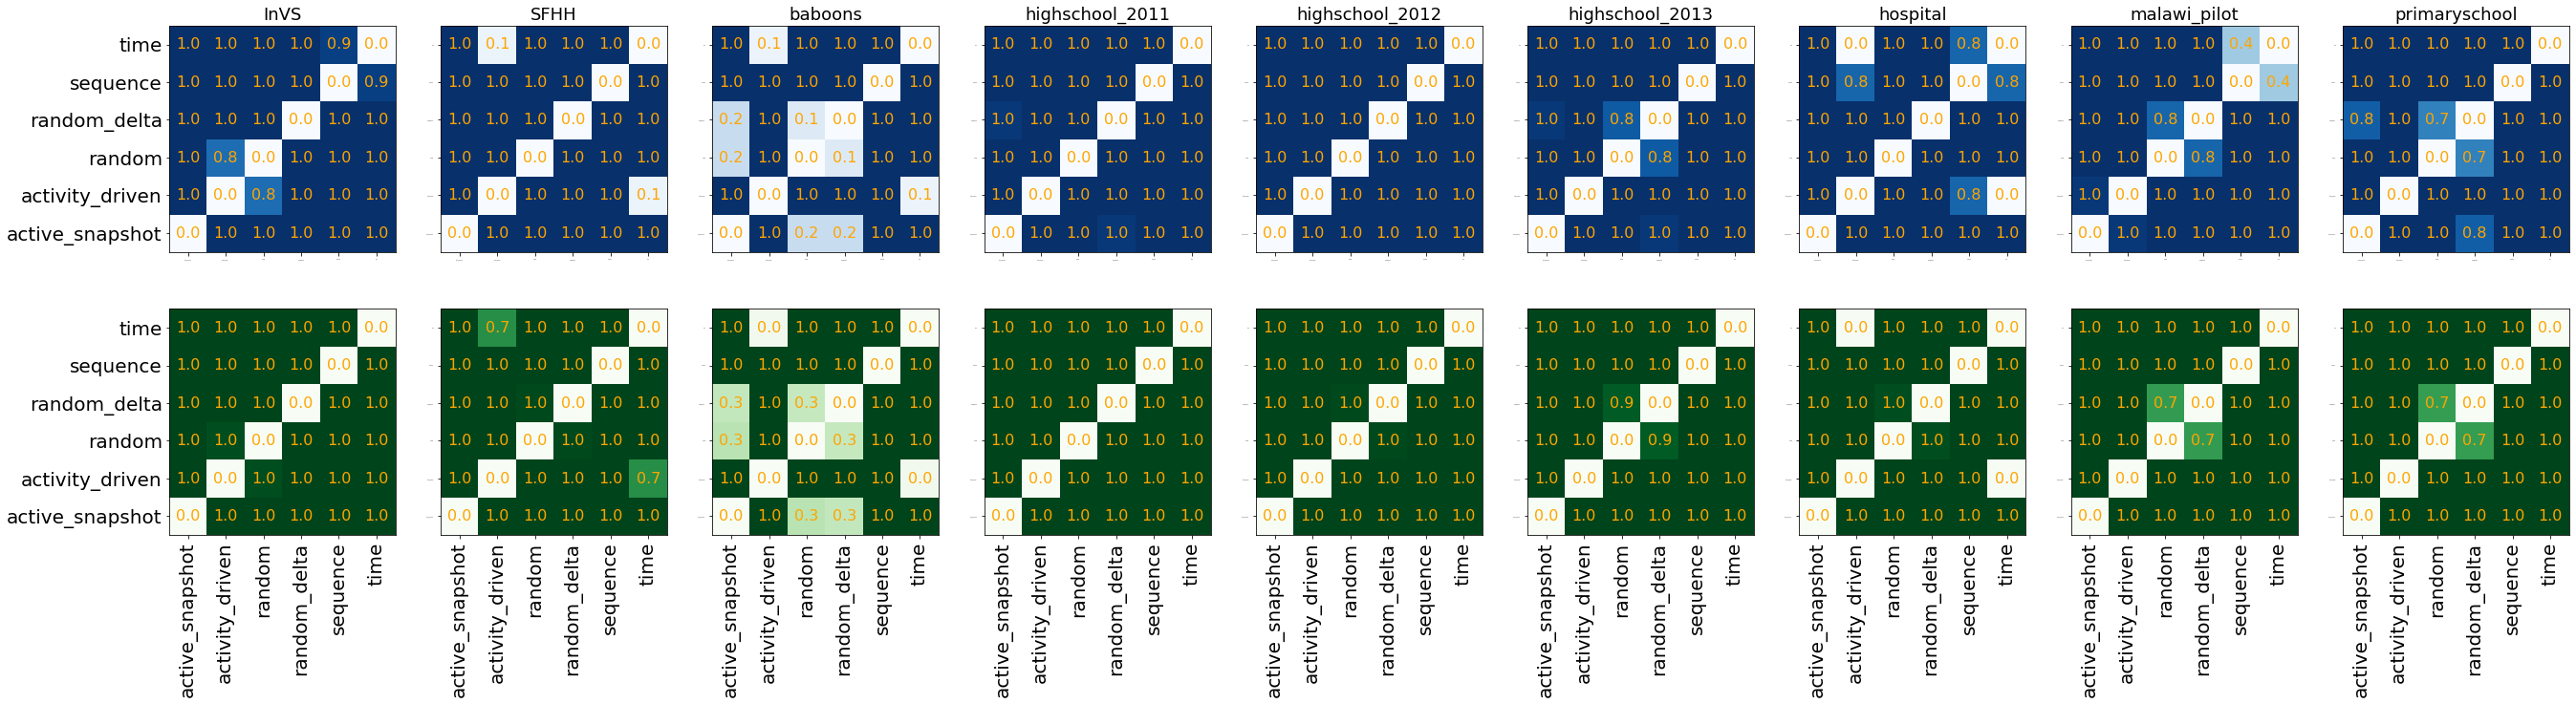

In [7]:
all_gtypes = listdir('Data/Embeddings/Shuffling/')

# graphs names
all_gnames = np.unique([x.split('-')[0] for x in all_gtypes])

# shuffling types
all_gtypes = np.unique([f(x.split('-')[1:]) for x in all_gtypes])

colors = ['Orange', 'Orange']
cmaps = ['Blues', 'Greens']

fig, ax = plt.subplots(2, len(all_gnames), figsize = (5*len(all_gnames), 2*5))

ROOT = 'Data/Results/' 

for i, name in enumerate(all_gnames):       
    for t, typeof in enumerate(['global', 'local']):
        
        if i == 0:
            ax[t,i].set_yticks(np.arange(len(all_gtypes)))
            ax[t,i].set_yticklabels(all_gtypes, fontsize = 20)
        else:
            ax[t,i].set_yticks(np.arange(len(all_gtypes)))
            ax[t,i].set_yticklabels(all_gtypes, fontsize = 0)

        
        M = pd.read_csv(ROOT + name + 'NMI_' + typeof + '.csv').set_index('Unnamed: 0').values
        ax[t,i].imshow(M + M.T, cmap = cmaps[t], vmin = 0, vmax = 1, origin = 'lower')
        
        
        for (b,a),label in np.ndenumerate(M + M.T):
            ax[t,i].text(a,b,np.round(label,1), ha = 'center',va ='center', fontsize = 16, color = colors[t])
        
        if t == 0:
            ax[t,i].set_title(name, fontsize = 18)
            ax[t,i].set_xticks(np.arange(len(all_gtypes)))
            ax[t,i].set_xticklabels(all_gtypes, fontsize = 0)
        
            
        else:
            ax[t,i].set_xticks(np.arange(len(all_gtypes)))
            ax[t,i].set_xticklabels(all_gtypes, rotation = 90, fontsize = 20)
    
# plt.savefig('../Figures/Recognize_shuffles.jpg', dpi = 400, bbox_inches = 'tight')
plt.show();